In [1]:
# Import required system
import sys
sys.path.append('/Users/hoto7260/Jacob_LIET2/LIET/liet')

# general
import matplotlib.pyplot as plt
import numpy as np
try:
    np.distutils.__config__.blas_opt_info = np.distutils.__config__.blas_ilp64_opt_info
except Exception:
    pass
import pandas as pd
from scipy.stats import pearsonr
import plotly.express as px

# my modules
from liet_res_class import FitParse
import plotting_funcs as pf
import analysis_funcs as af

# setting plotting paramaters
from pylab import rcParams
rcParams['figure.figsize'] = 20, 6
rcParams['font.size'] = 15
#plt.rcParams.update({'font.size': 22})

## See if GROseq experiments show significantly different mT values compared to PROseq
Data: MCF7
- Andrysik (GRO): SRR4090102, SRR4090103
- Li21 (GRO): SRR817000, SRR817001
- Li13 (GRO): SRR10298307, SRR10298308
    - Means can also see if similar trends within same lab (perhaps protocol might play a role)
- Tan (PRO): SRR3541129
- Horibata (PRO): SRR5150555, SRR5150536, SRR5150539, SRR5150538
1. Take in each dataset
2. Filter out >0.6 w_B
3. Graph the histograms within experiments
4. Graph the histograms of all PRO and GRO experiments (overlapping)

In [2]:
# Take in all datasets
#=========GRO===============================
# And 1a
log_file = "/Users/hoto7260/LIET_cell_type/mcf7/output/SRR4090102.mcf7.1030.liet.log"
res_file = "/Users/hoto7260/LIET_cell_type/mcf7/output/SRR4090102.mcf7.1030.liet"
And_02 = pf.FitParse(res_file=res_file, log_file=log_file)
And_02.df.name = "And 1"
# And 1b
log_file = "/Users/hoto7260/LIET_cell_type/mcf7/output/SRR4090103.mcf7.1030.liet.log"
res_file = "/Users/hoto7260/LIET_cell_type/mcf7/output/SRR4090103.mcf7.1030.liet"
And_03 = pf.FitParse(res_file=res_file, log_file=log_file)
And_03.df.name = "And 2"

# # Li13 2a
# log_file = "/Users/hoto7260/LIET_cell_type/mcf7/output/SRR10298307.mcf7.1030.liet.log"
# res_file = "/Users/hoto7260/LIET_cell_type/mcf7/output/SRR10298307.mcf7.1030.liet"
# Li13_07 = pf.FitParse(res_file=res_file, log_file=log_file)
# Li13_07.df.name = "Li13 1"
# # Li13 2b
# log_file = "/Users/hoto7260/LIET_cell_type/mcf7/output/SRR10298308.mcf7.1030.liet.log"
# res_file = "/Users/hoto7260/LIET_cell_type/mcf7/output/SRR10298308.mcf7.1030.liet"
# Li13_08 = pf.FitParse(res_file=res_file, log_file=log_file)
# Li13_08.df.name = "Li13 2"

# # Li21 3a
# log_file = "/Users/hoto7260/LIET_cell_type/mcf7/output/SRR817000.mcf7.1030.liet.log"
# res_file = "/Users/hoto7260/LIET_cell_type/mcf7/output/SRR817000.mcf7.1030.liet"
# Li21_00 = pf.FitParse(res_file=res_file, log_file=log_file)
# Li21_00.df.name = "Li21 1"
# # Li21 3b
# log_file = "/Users/hoto7260/LIET_cell_type/mcf7/output/SRR817001.mcf7.1030.liet.log"
# res_file = "/Users/hoto7260/LIET_cell_type/mcf7/output/SRR817001.mcf7.1030.liet"
# Li21_01 = pf.FitParse(res_file=res_file, log_file=log_file)
# Li21_01.df.name = "Li21 2"

#=========PRO===============================
# # Tan 1a
# log_file = "/Users/hoto7260/LIET_cell_type/mcf7/output/SRR3541129.mcf7.1030.liet.log"
# res_file = "/Users/hoto7260/LIET_cell_type/mcf7/output/SRR3541129.mcf7.1030.liet"
# Tan_29 = pf.FitParse(res_file=res_file, log_file=log_file)
# Tan_29.df.name = "Tan"

# Hor 1a
log_file = "/Users/hoto7260/LIET_cell_type/mcf7/output/SRR5150555.mcf7.1030.liet.log"
res_file = "/Users/hoto7260/LIET_cell_type/mcf7/output/SRR5150555.mcf7.1030.liet"
Hor_55 = pf.FitParse(res_file=res_file, log_file=log_file)
Hor_55.df.name = "Hor 1"
# Hor 1b
log_file = "/Users/hoto7260/LIET_cell_type/mcf7/output/SRR5150536.mcf7.1030.liet.log"
res_file = "/Users/hoto7260/LIET_cell_type/mcf7/output/SRR5150536.mcf7.1030.liet"
Hor_36 = pf.FitParse(res_file=res_file, log_file=log_file)
Hor_36.df.name = "Hor 2"
# # Hor 1c
# log_file = "/Users/hoto7260/LIET_cell_type/mcf7/output/SRR5150538.mcf7.1030.liet.log"
# res_file = "/Users/hoto7260/LIET_cell_type/mcf7/output/SRR5150538.mcf7.1030.liet"
# Hor_38 = pf.FitParse(res_file=res_file, log_file=log_file)
# Hor_38.df.name = "Hor 3"
# # Hor 1d
# log_file = "/Users/hoto7260/LIET_cell_type/mcf7/output/SRR5150539.mcf7.1030.liet.log"
# res_file = "/Users/hoto7260/LIET_cell_type/mcf7/output/SRR5150539.mcf7.1030.liet"
# Hor_39 = pf.FitParse(res_file=res_file, log_file=log_file)
# Hor_39.df.name = "Hor 4"


In [ ]:
# Filter out
# GRO
[And_02_f_df, And_03_f_df] = af.filter_dfs([And_02.df, And_03.df],col='w_B_mean',
                                            value=0.6, comparison='<')
[Li13_07_f_df, Li13_08_f_df] = af.filter_dfs([Li13_07.df, Li13_08.df],col='w_B_mean',
                                            value=0.6, comparison='<')
[Li21_00_f_df, Li21_01_f_df] = af.filter_dfs([Li21_00.df, Li21_01.df],col='w_B_mean',
                                            value=0.6, comparison='<')
# PRO
[Tan_29_f_df] = af.filter_dfs([Tan_29.df], col='w_B_mean', value=0.6, comparison='<')
df_list = [Hor_55.df, Hor_36.df, Hor_38.df, Hor_39.df]
[Hor_55_f_df, Hor_36_f_df, Hor_38_f_df, Hor_39_f_df] = af.filter_dfs(df_list,
                                                                     col='w_B_mean',value=0.6, 
                                                                     comparison='<')



In [3]:
# Filter out (only 1030)
# GRO
[And_02_f_df, And_03_f_df] = af.filter_dfs([And_02.df, And_03.df],col='w_B_mean',
                                            value=0.6, comparison='<')

# PRO
df_list = [Hor_55.df, Hor_36.df]
[Hor_55_f_df, Hor_36_f_df] = af.filter_dfs(df_list, col='w_B_mean',value=0.6, 
                                                comparison='<')


#### Get all information in a dataframe

In [ ]:
# Make one massive dataframe w/ info from all dataframes for all experiments
# all info of interest
col_list = ['pos_cov', 'w_B_mean', 'mT_mean', 'mT_stdev', 'mL_mean', 'mL_stdev']
df_list = [And_02_f_df, And_03_f_df,
          Li13_07_f_df, Li13_08_f_df,
          Li21_00_f_df, Li21_01_f_df,
          Tan_29_f_df,
          Hor_55_f_df, Hor_36_f_df, Hor_38_f_df, Hor_39_f_df]
name_list = ['And 02', 'And 03',
             'Li13 07', 'Li13 08',
             'Li21 00', 'Li21 01',
             'Tan 29',
             'Hor 55', 'Hor 36', 'Hor 38', 'Hor 39']
mcf7_full_df = af.df_combiner(col_list, df_list, name_list)

In [5]:
# Just 1030
# Make one massive dataframe w/ info from all dataframes for all experiments
# all info of interest
    # hct116
col_list = ['pos_cov', 'w_B_mean', 'mT_mean', 'mT_stdev', 'mL_mean', 'mL_stdev']
df_list = [And_02_f_df, And_03_f_df,
          Hor_55_f_df, Hor_36_f_df]
name_list = ['And 02', 'And 03',
             'Hor 55', 'Hor 36']
mcf7_full_df = af.df_combiner(col_list, df_list, name_list)
print(mcf7_full_df.columns)

After merging And 03, # genes= 199
After merging Hor 55, # genes= 196
After merging Hor 36, # genes= 196
After merging And 03, # genes= 196
After merging Hor 55, # genes= 196
After merging Hor 36, # genes= 196
After merging And 03, # genes= 196
After merging Hor 55, # genes= 196
After merging Hor 36, # genes= 196
After merging And 03, # genes= 196
After merging Hor 55, # genes= 196
After merging Hor 36, # genes= 196
After merging And 03, # genes= 196
After merging Hor 55, # genes= 196
After merging Hor 36, # genes= 196
After merging And 03, # genes= 196
After merging Hor 55, # genes= 196
After merging Hor 36, # genes= 196
Index(['gene', 'strand', 'And 02_pos_cov', 'And 03_pos_cov', 'Hor 55_pos_cov',
       'Hor 36_pos_cov', 'And 02_w_B_mean', 'And 03_w_B_mean',
       'Hor 55_w_B_mean', 'Hor 36_w_B_mean', 'And 02_mT_mean',
       'And 03_mT_mean', 'Hor 55_mT_mean', 'Hor 36_mT_mean', 'And 02_mT_stdev',
       'And 03_mT_stdev', 'Hor 55_mT_stdev', 'Hor 36_mT_stdev',
       'And 02_mL_mea

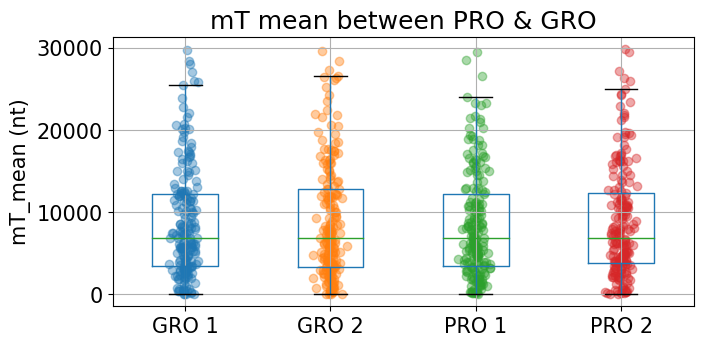

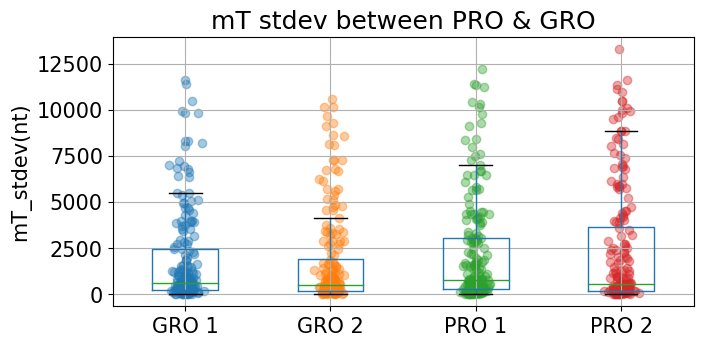

In [11]:
# removed 'ACTC1' since that had high stdev in all
datadict = {'GRO 1': mcf7_full_df['And 02_mT_mean'], 
            'GRO 2': mcf7_full_df['And 03_mT_mean'],
            'PRO 1': mcf7_full_df['Hor 36_mT_mean'], 
            'PRO 2': mcf7_full_df['Hor 55_mT_mean']}
title = "mT mean between PRO & GRO"
y_label = 'mT_mean (nt)'
pf.box_plotter_all(datadict, title=title, y_label=y_label, showmeans=False)
# removed 'ACTC1' since that had high stdev in all
datadict = {'GRO 1': mcf7_full_df['And 02_mT_stdev'], 
            'GRO 2': mcf7_full_df['And 03_mT_stdev'],
            'PRO 1': mcf7_full_df['Hor 36_mT_stdev'], 
            'PRO 2': mcf7_full_df['Hor 55_mT_stdev']}
title = "mT stdev between PRO & GRO"
y_label = 'mT_stdev(nt)'
pf.box_plotter_all(datadict, title=title, y_label=y_label, showmeans=False)

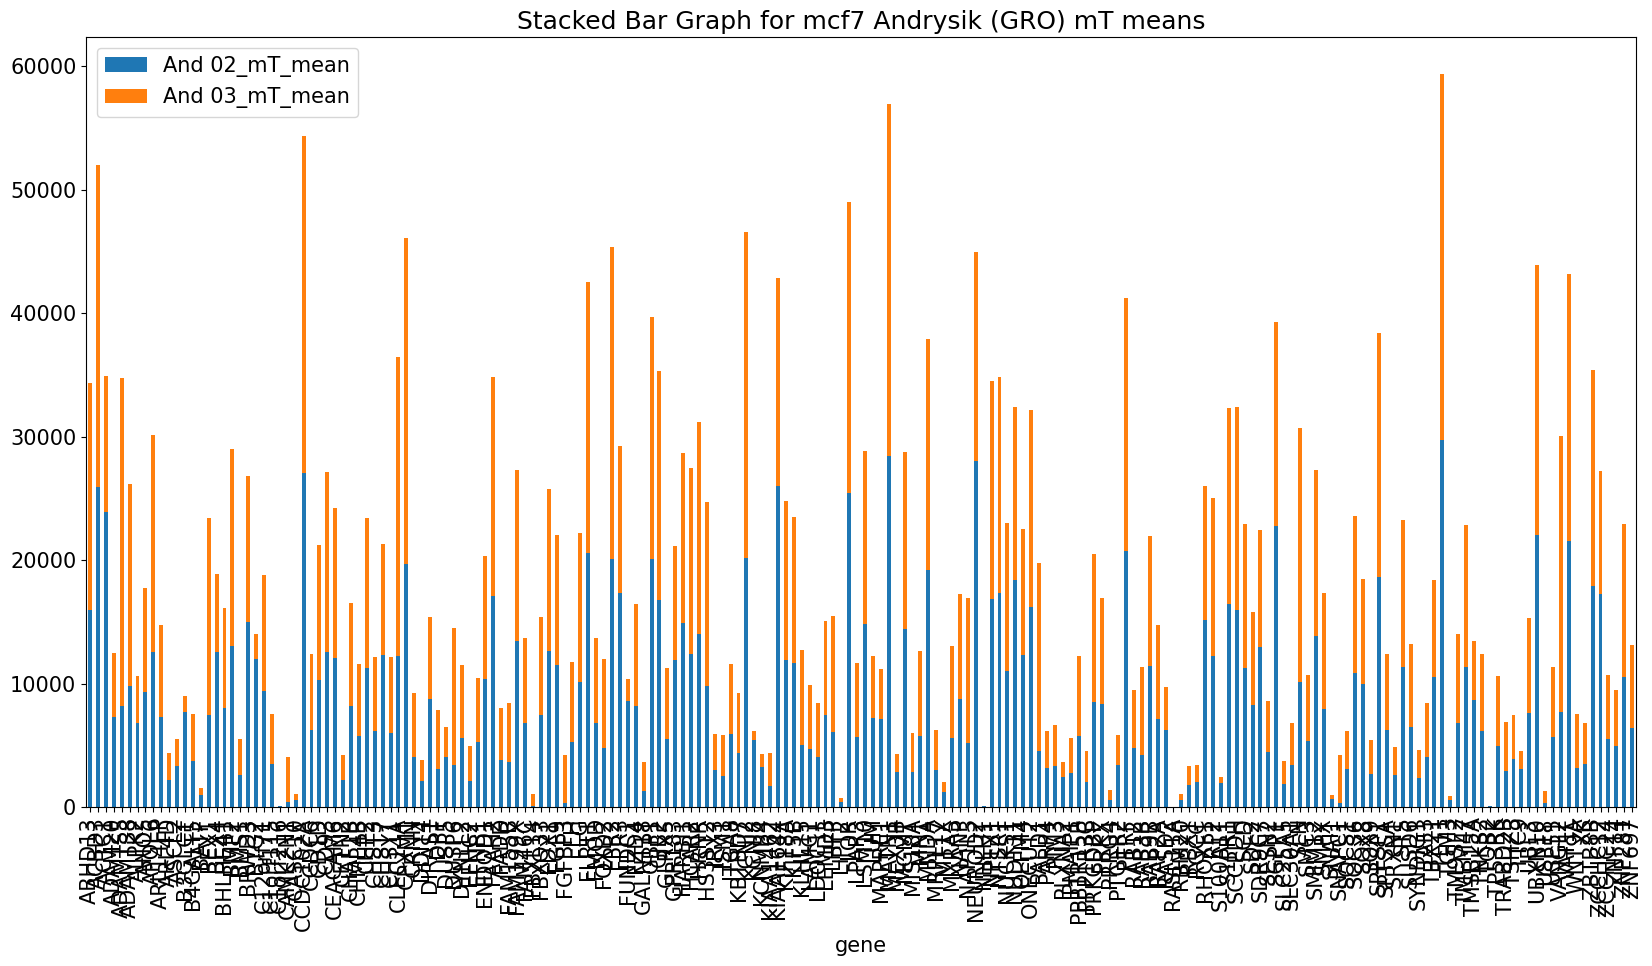

TypeError: no numeric data to plot

In [7]:
# And GRO
And_mTmean_df = mcf7_full_df.filter(regex='And..._mT_mean|gene')
And_mTmean_df.plot(x='gene', kind='bar', stacked=True,
        title='Stacked Bar Graph for mcf7 Andrysik (GRO) mT means', figsize=(20,10))
plt.show()
# Li13 GRO
Li13_mTmean_df = mcf7_full_df.filter(regex='Li13..._mT_mean|gene')
Li13_mTmean_df.plot(x='gene', kind='bar', stacked=True,
        title='Stacked Bar Graph for mcf7 Li 2013 (GRO) mT means', figsize=(20,10))
plt.show()
# Li21 GRO
Li21_mTmean_df = mcf7_full_df.filter(regex='Li21..._mT_mean|gene')
Li21_mTmean_df.plot(x='gene', kind='bar', stacked=True,
        title='Stacked Bar Graph for mcf7 Li 2021 (GRO) mT means', figsize=(20,10))
plt.show()

# Hor PRO
Hor_mTmean_df = mcf7_full_df.filter(regex='Hor..._mT_mean|gene')
Hor_mTmean_df.plot(x='gene', kind='bar', stacked=True,
        title='Stacked Bar Graph for mcf7 Horibata (PRO) mT means', figsize=(20,10))
plt.show()

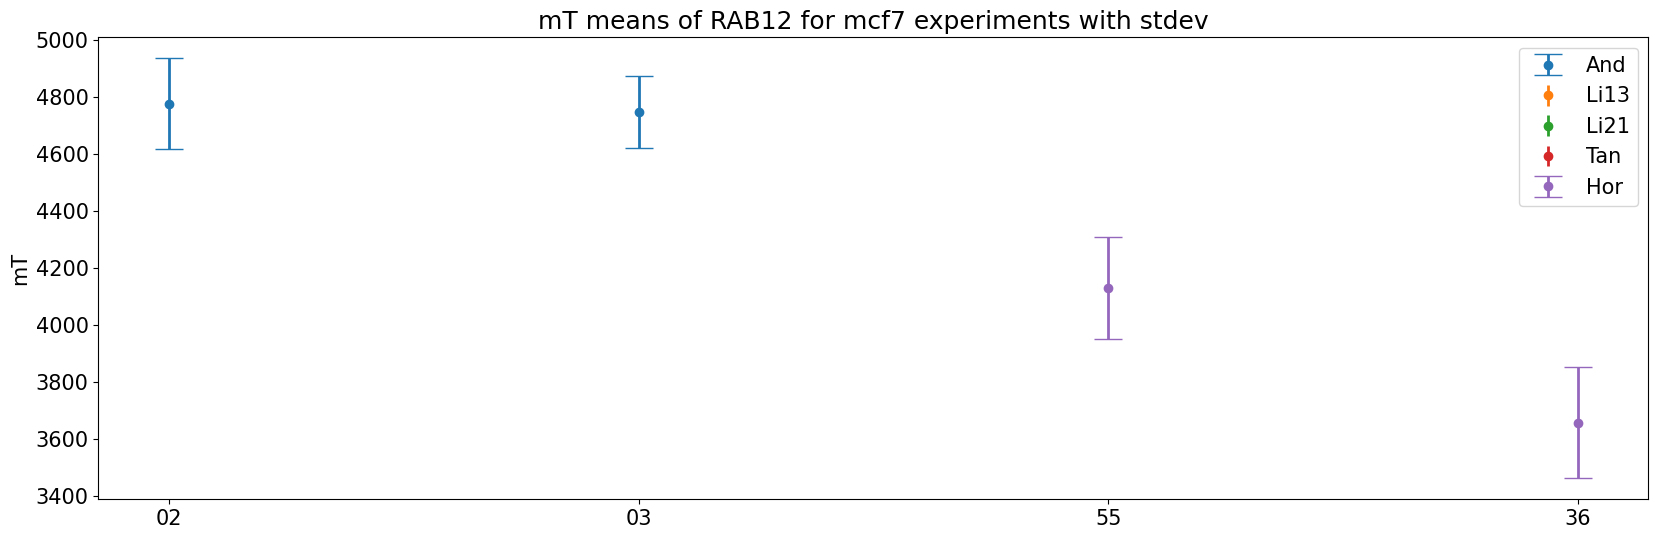

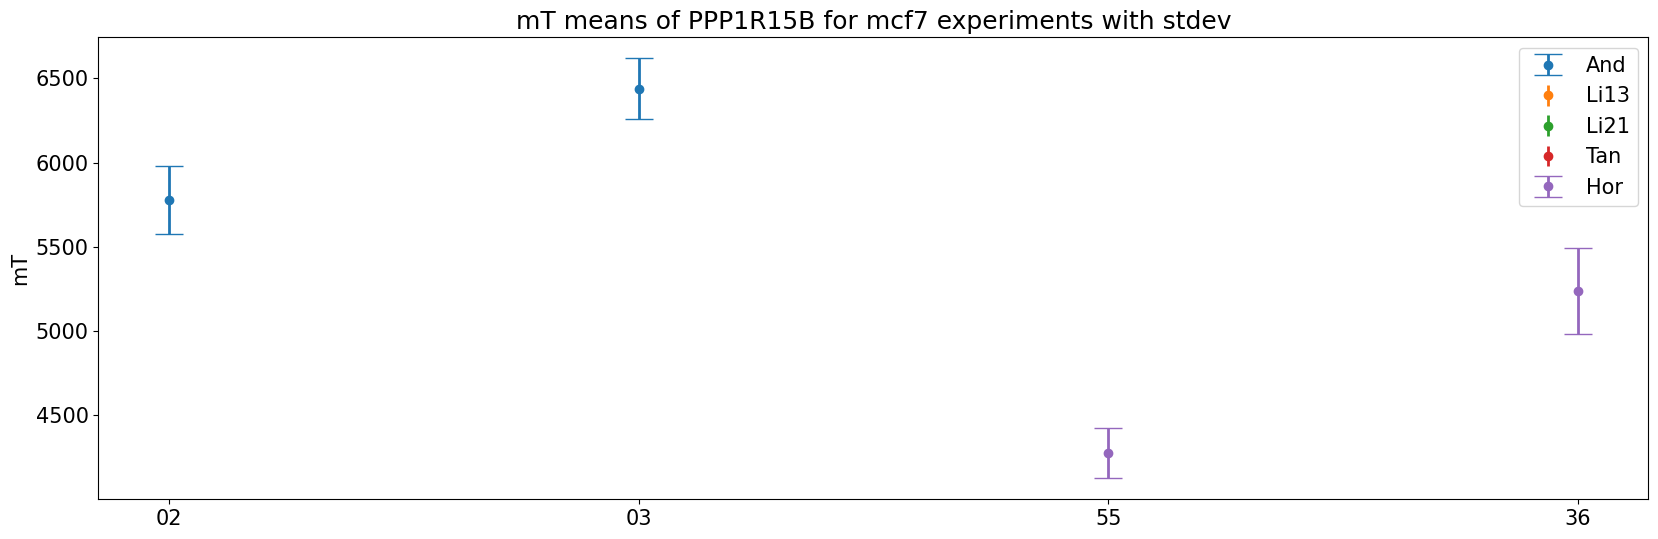

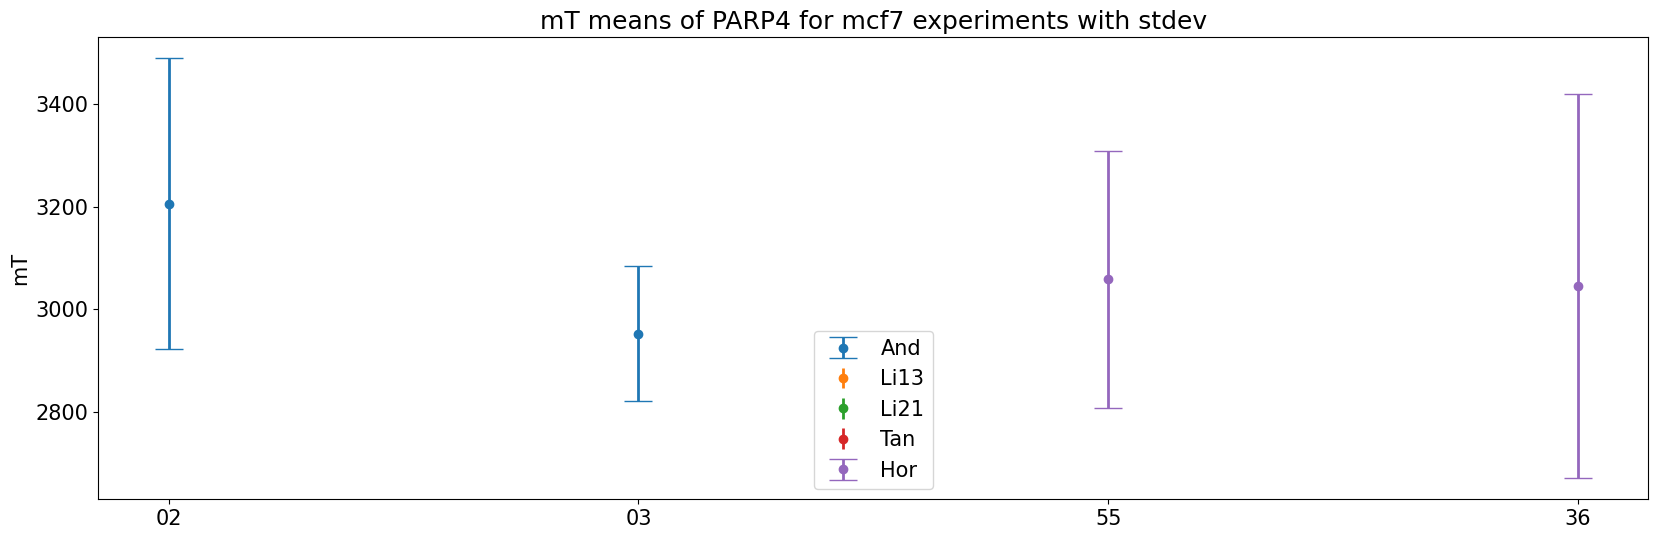

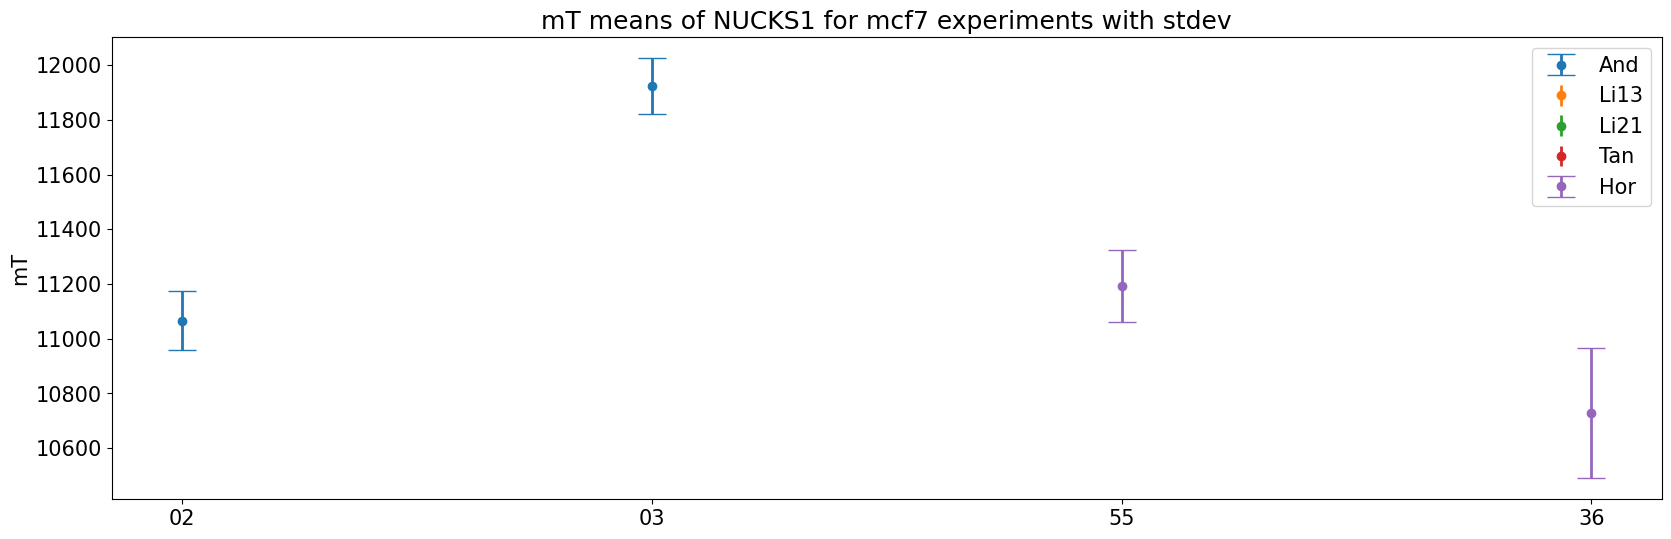

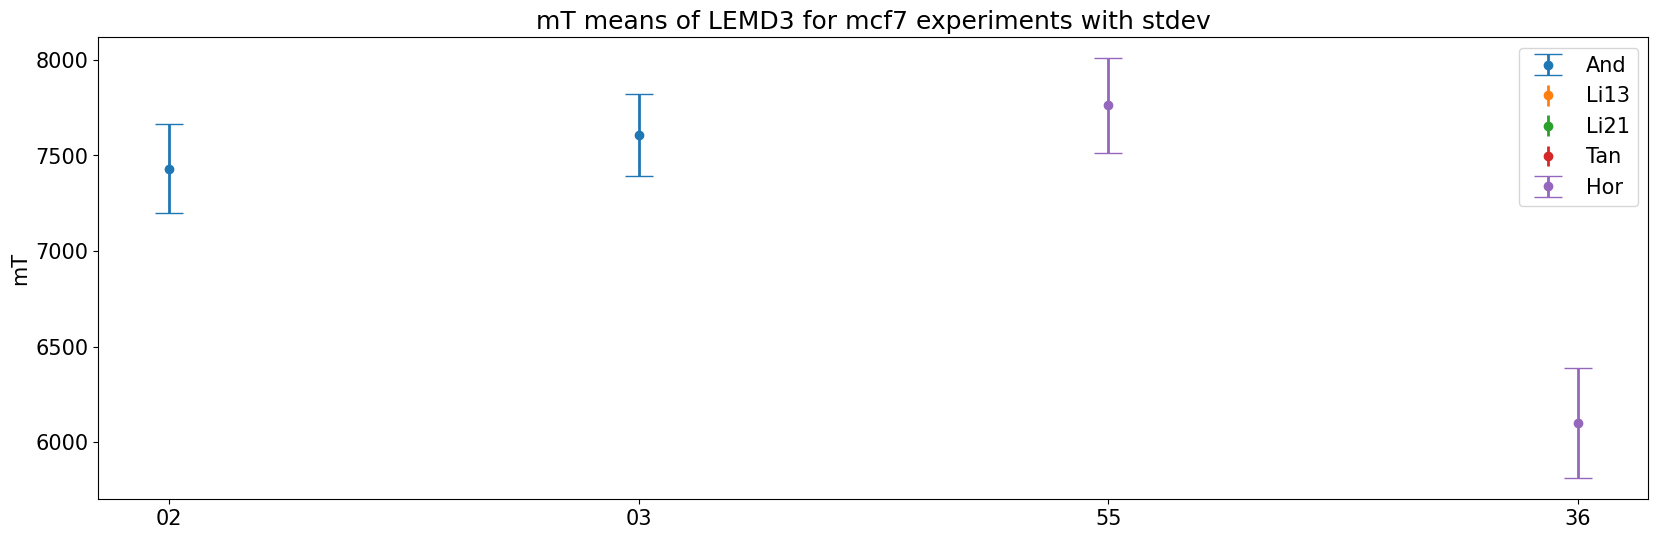

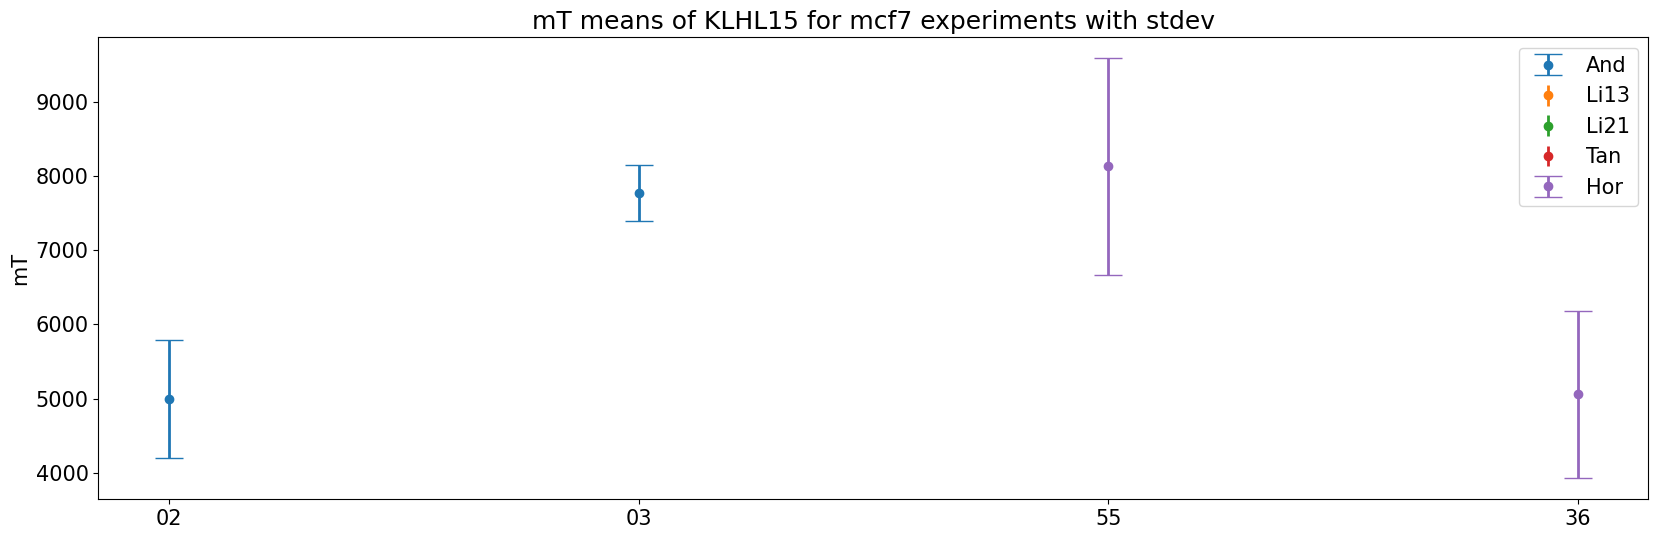

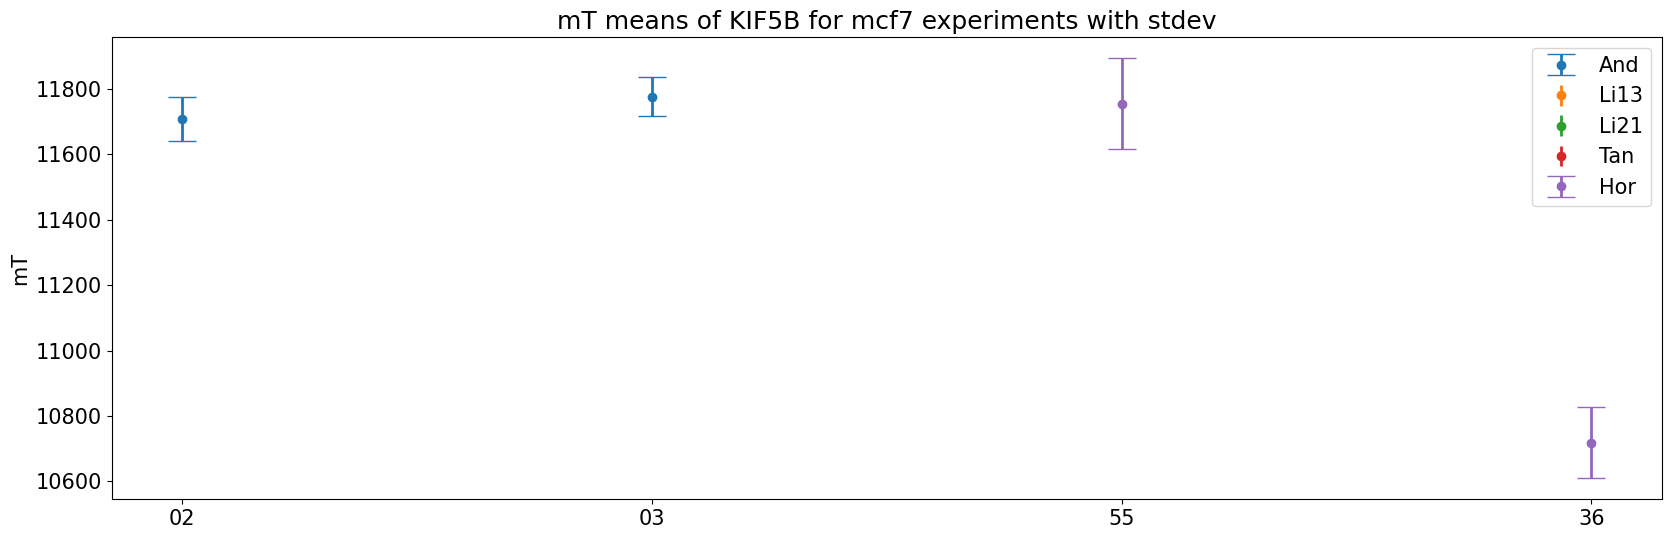

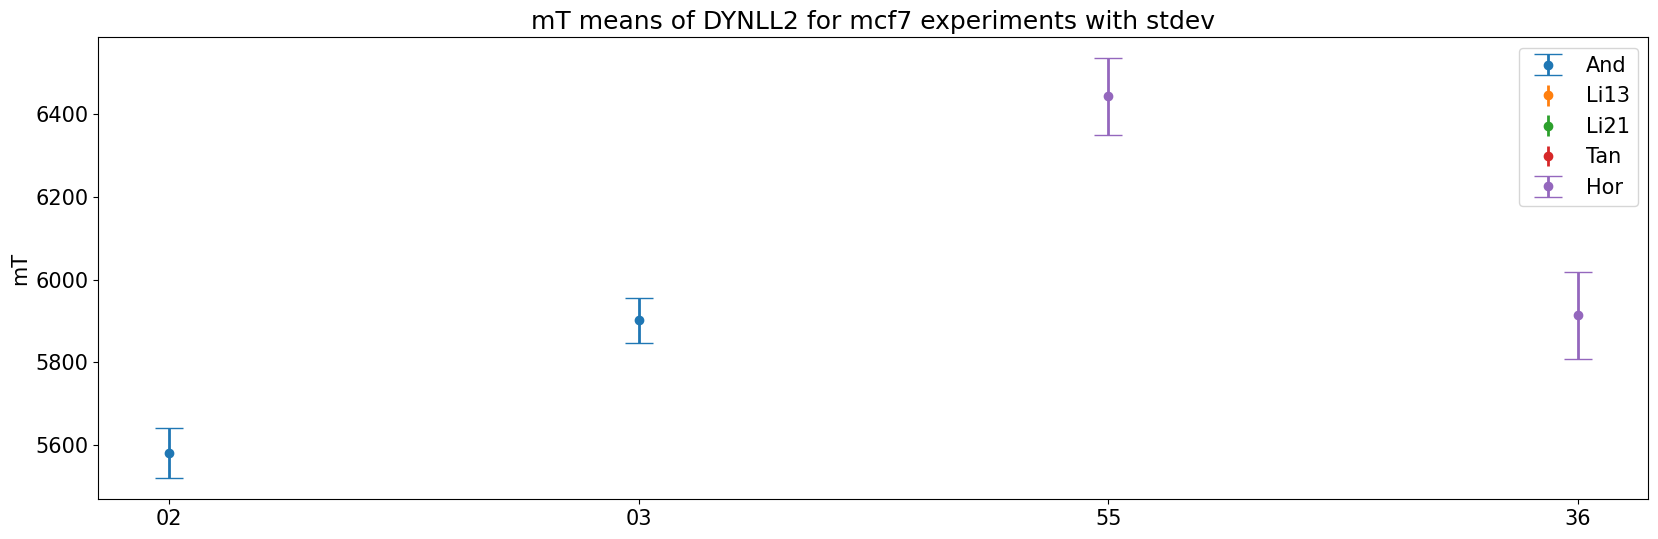

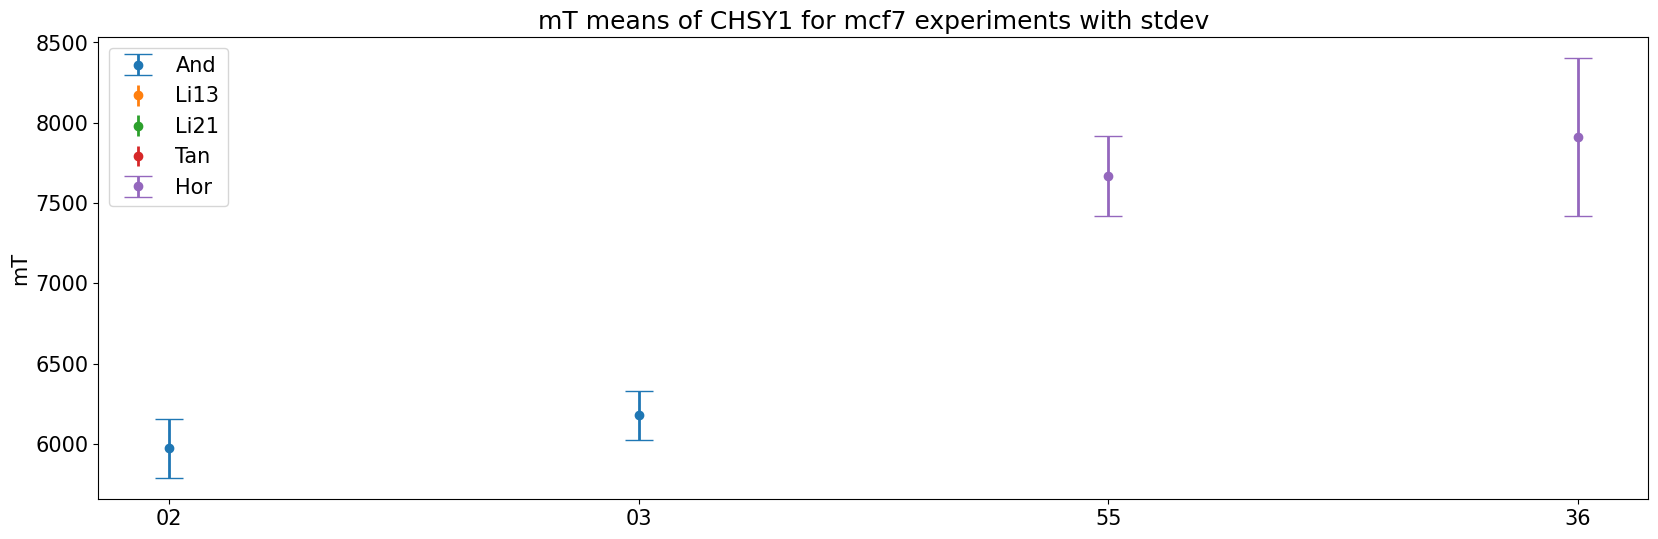

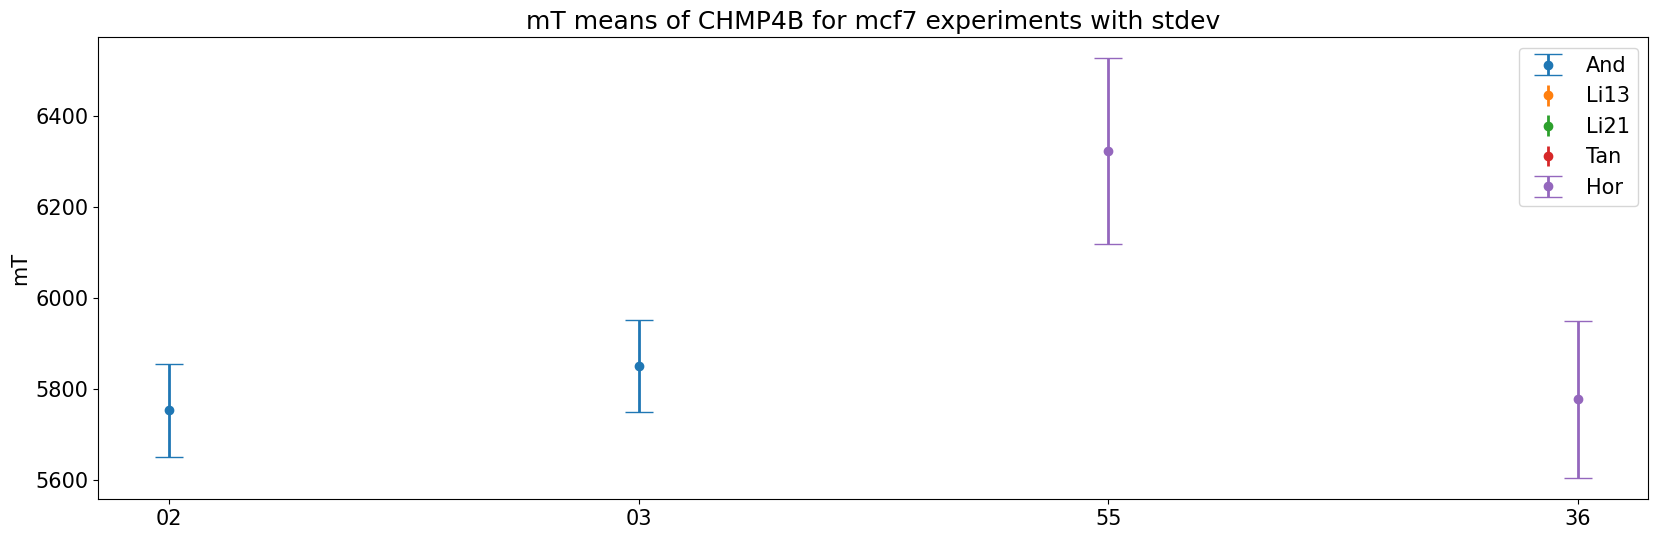

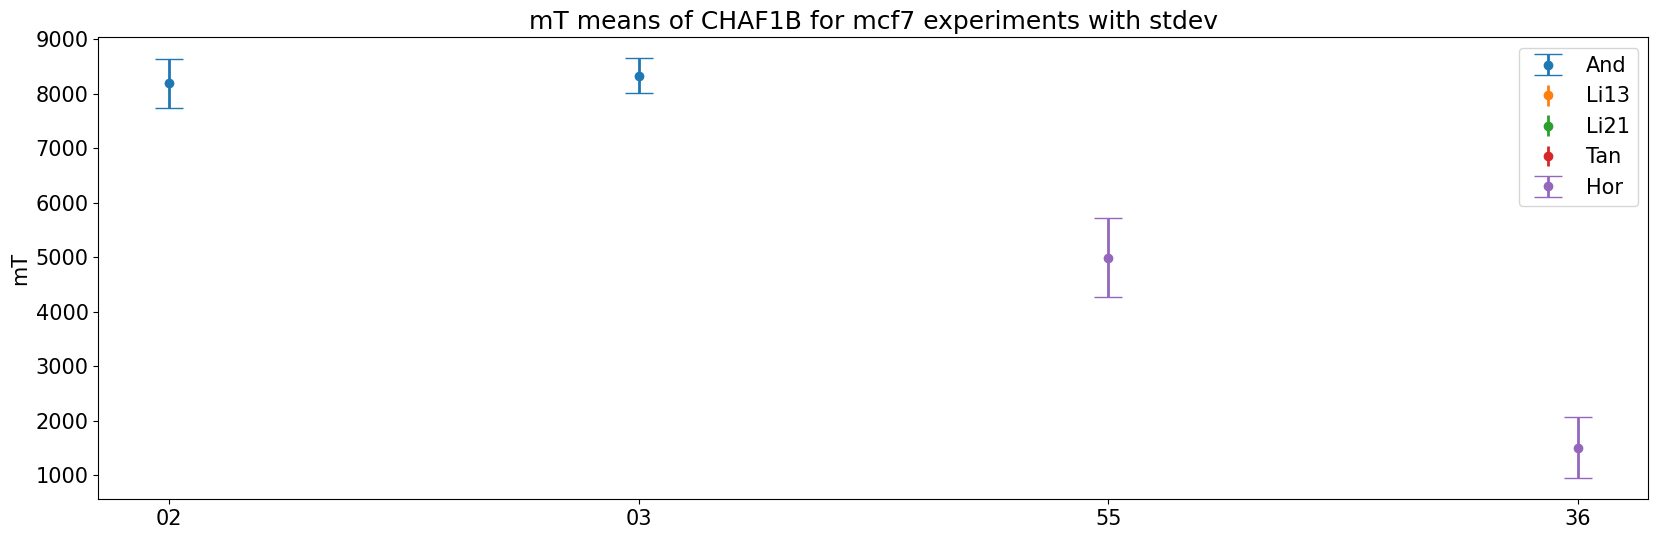

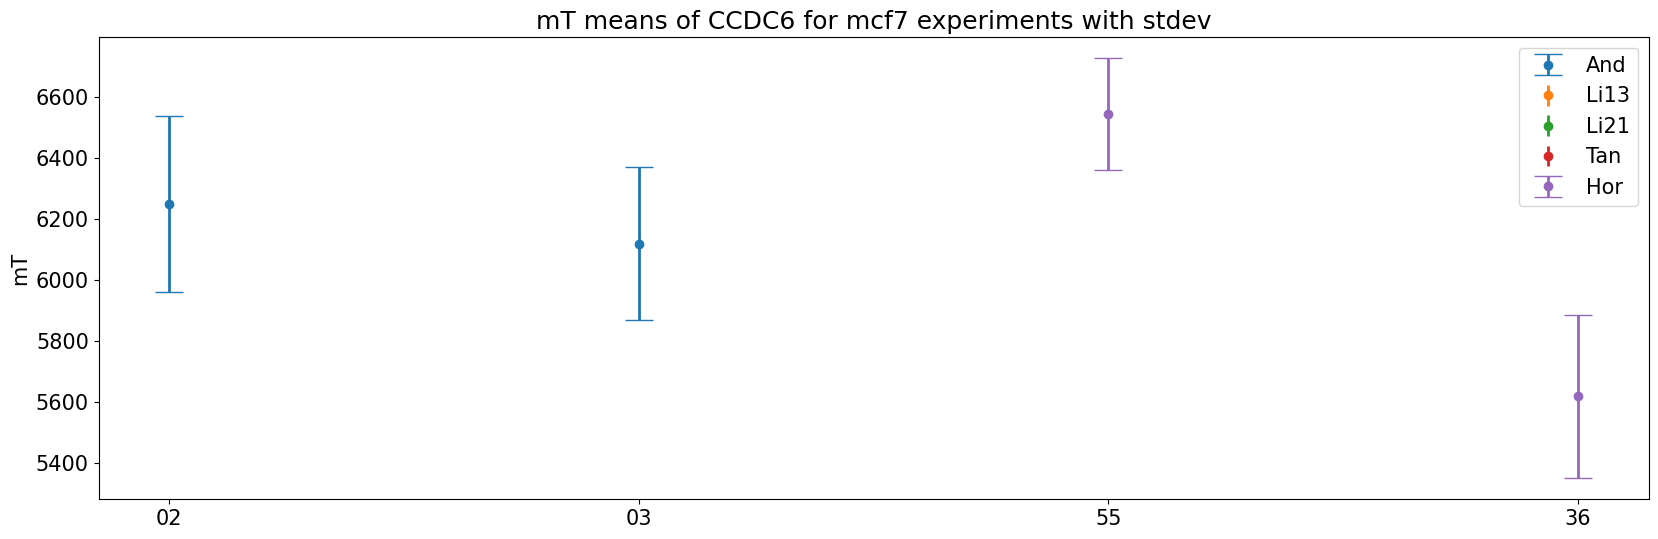

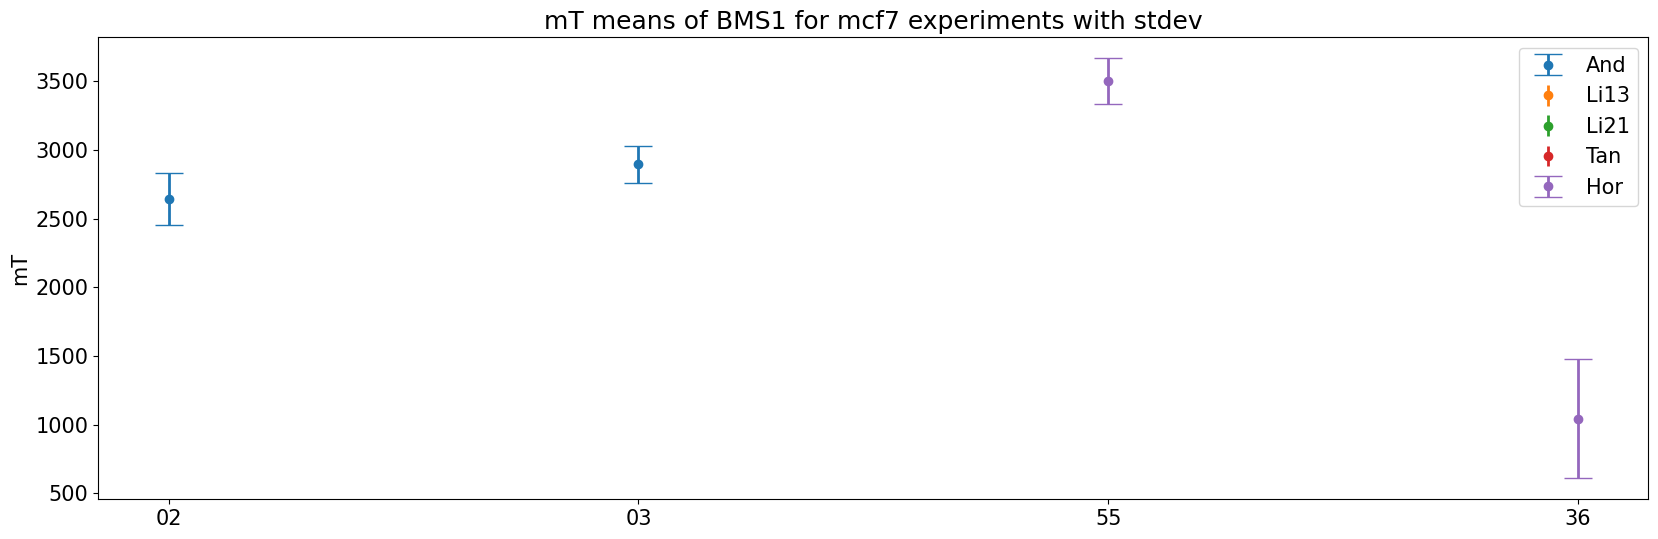

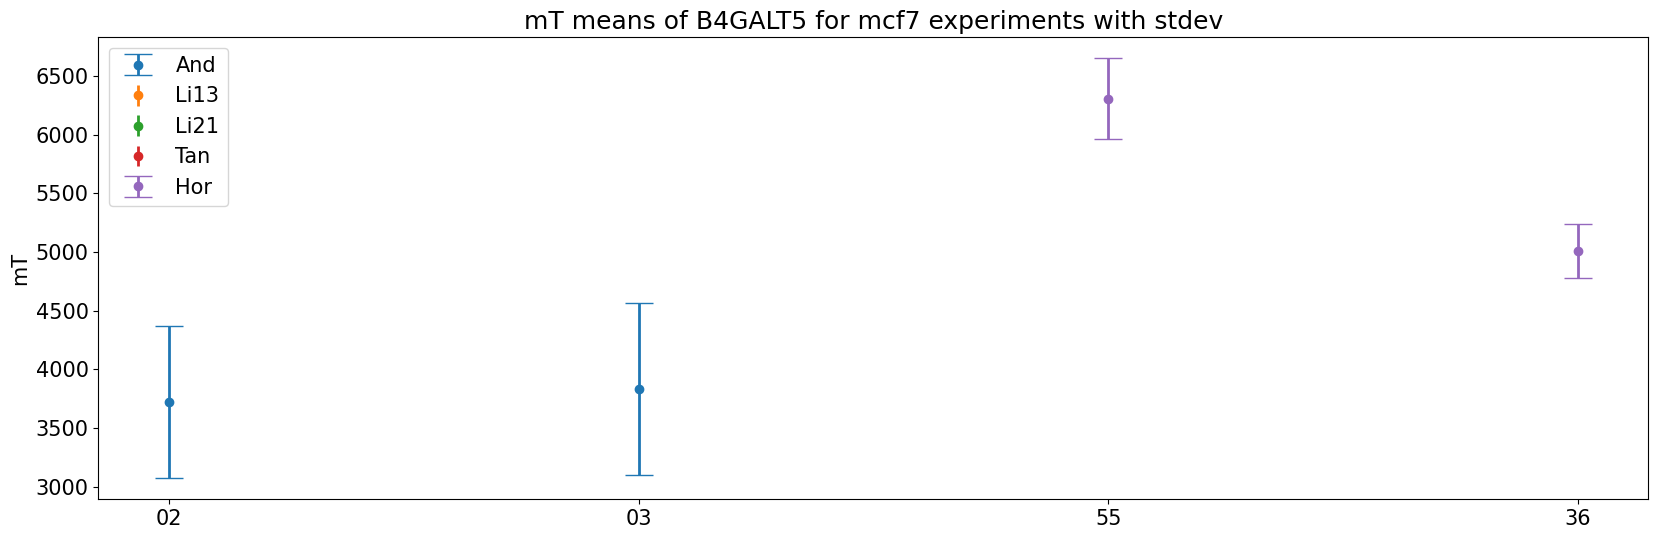

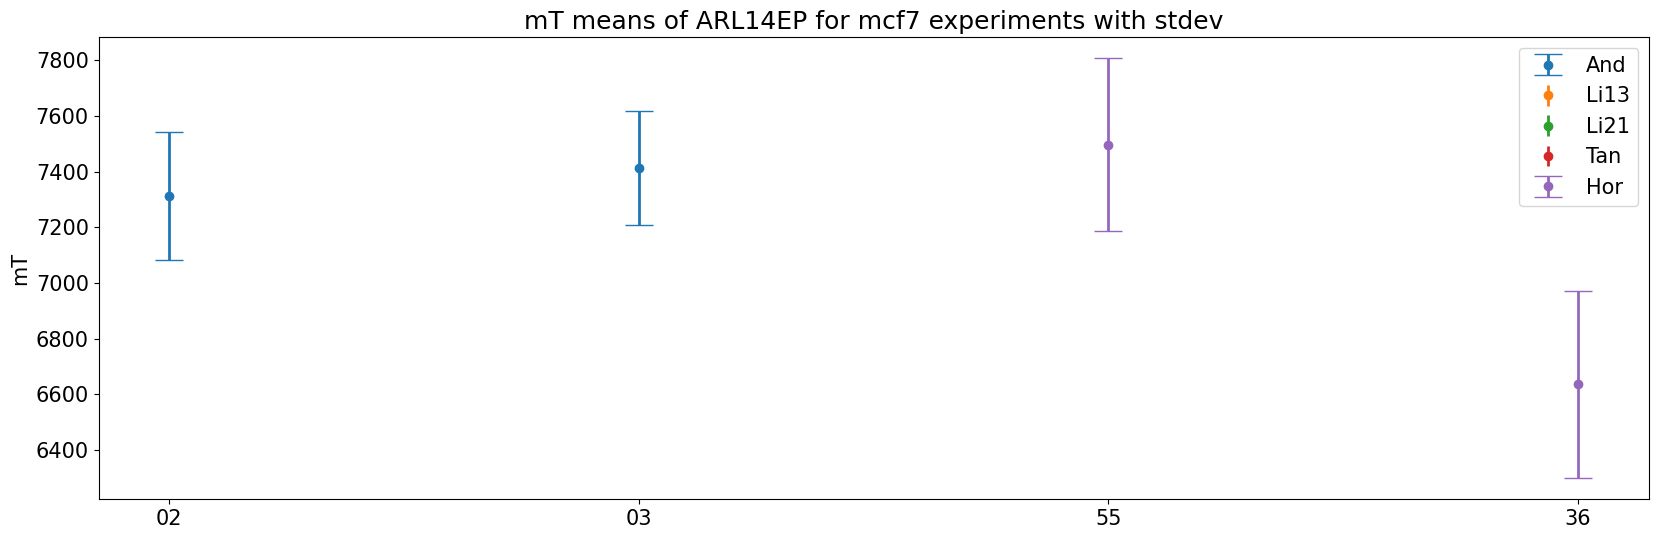

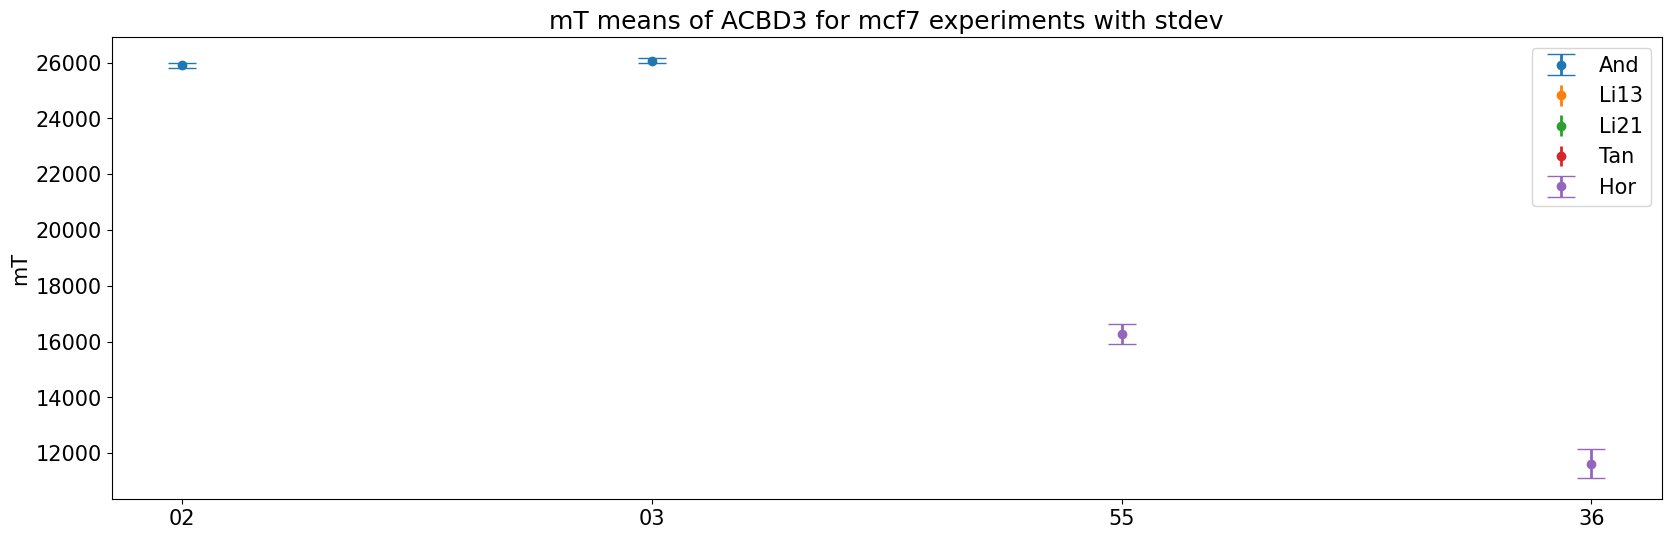

In [11]:
# generally similar
# best
simbest = ['ACBD3', 'CHSY1','FBXL14','FH','KBTBD7','KIF18A','PRKX',
           'RBX1','TM9SF2','ZNF14']
#Not the best
simnot = ['B4GALT5', 'FDX1','FUNDC1','TAF3','TET1','TNKS2',]
# Pretty bad
simbad = ['B3GLCT', 'UBL3']

# 2 term places?
twobest = ['NUCKS1','PIM3','PPP1R15B']
twomost = ['KLHL15','MIS18A','NANP']
twoprob = ['GLRX5', 'KIF5B','PARP4','SPTSSA']
twobad = ['BMS1','DUSP5','PTRF', 'RAB12','RGCC','SDE2',
          'SESN2','SMC3','SNAPC1']

# diverse but good stdev for all
['SUSD6', 'ZCCHC24']

ru_list = ['ZSWIM6', 'ZNF777', 'ZBTB34', 'TOB2', 'TNKS2', 
 'TMEM185B', 'TMED7', 'TM9SF2', 'SPTSSA', 'SNAPC1', 
 'SMC3', 'SLC30A1', 'SLC25A5', 'SIAH2', 'SESN2', 
 'SERTAD2', 'SDE2', 'SCD', 'RPS12', 'RBX1', 'RAB12', 
 'PPP1R3B', 'PPP1R15B', 'PPIL4', 'PLEKHF2', 'PHIP', 
 'PELO', 'PARP4', 'PANK3', 'NUS1', 'NUDT3', 'NUCKS1', 
 'LRRC58', 'LEMD3', 'KRCC1', 'KLHL15', 'KIF5B', 'IRS1', 
 'HS6ST1', 'GLO1', 'FBXO30', 'DYNLL2', 'CHSY1', 'CHMP4B',
 'CHAF1B', 'CDC5L', 'CD2AP', 'CCDC6', 'BMS1', 'B4GALT5', 
 'ARL14EP', 'ANP32B', 'ACBD3']


for gene in ru_list[20:]:
    if gene in mcf7_full_df.index:
        pf.meanerror_plotter(full_df=mcf7_full_df , gene=gene, par='mT', cats=['And', 'Li13','Li21', 'Tan', 'Hor'], group_name='mcf7')
        #meanerror_plotter(full_df=mcf7_full_df , gene=gene, par='mL', cats=['And', 'Li13','Li21', 'Tan', 'Hor'], group_name='mcf7')

In [ ]:
import plotly as px
# Graph results
fig = px.scatter(mcf7_full_df, x= 'g401_1_mT_mean', y='g401_2_mT_mean', 
                 color='g401_1_pos_cov', size='g401_2_pos_cov',
                hover_data=['g401_2_w_B_mean', 'g401_2_w_B_mean'])
fig.show()

In [17]:
print(mcf7_full_df.columns)

Index(['gene', 'And 02_pos_cov', 'And 03_pos_cov', 'Hor 55_pos_cov',
       'Hor 36_pos_cov', 'And 02_w_B_mean', 'And 03_w_B_mean',
       'Hor 55_w_B_mean', 'Hor 36_w_B_mean', 'And 02_mT_mean',
       'And 03_mT_mean', 'Hor 55_mT_mean', 'Hor 36_mT_mean', 'And 02_mT_stdev',
       'And 03_mT_stdev', 'Hor 55_mT_stdev', 'Hor 36_mT_stdev',
       'And 02_mL_mean', 'And 03_mL_mean', 'Hor 55_mL_mean', 'Hor 36_mL_mean',
       'And 02_mL_stdev', 'And 03_mL_stdev', 'Hor 55_mL_stdev',
       'Hor 36_mL_stdev'],
      dtype='object')


In [19]:
dimensions = []
for i in mcf7_full_df.columns:
    if "mT_mean" in i:
        dimensions.append(i)
fig = px.scatter_matrix(mcf7_full_df, dimensions = dimensions, color="gene")
fig.show()

/Users/hoto7260/miniconda3/envs/secondenv/lib/python3.9/site-packages/plotly/express/_core.py:279: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  dims = [
